# Image Classification using ML

<pre>
1. Consider a medical image dataset. Use machine learning classifiers such as Logistic Regression, Gaussian Bayes, K Nearest Neighbor & Random Forest to perform classification over the dataset selected. 
Evaluate the performance of classifier using Confusion Matrix and ROC. Based on the results suggest which ML classifier will be best suited for your dataset classification.

2. Apply necessary pre-processing techniques and identify other possible enhancement methods to increase the accuracy of your classifier. 
Strike a neat comparison with the accuracy results obtained earlier.
</pre>

# Kaggle Dataset

## Drive Connection

In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


## Get key

In [2]:
!mkdir /root/.kaggle/
!cp /drive/MyDrive/kaggle.json /root/.kaggle/

In [3]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 2.8 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=a5b56a15480fb17e41a00d5afb6db5e73052b434e15f4f0a740da00fc5665cd2
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


## Download medical image dataset

In [4]:
!kaggle competitions download -c aptos2019-blindness-detection

100% 9.50G/9.51G [03:12<00:00, 96.1MB/s]
100% 9.51G/9.51G [03:12<00:00, 53.1MB/s]


In [5]:
!unzip -qq aptos2019-blindness-detection.zip

# Imports

In [6]:
import cv2
import os
from google.colab.patches import cv2_imshow
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Getting Dataset ready for direct usage

In [7]:
train = pd.read_csv("train.csv")
train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [9]:
test = pd.read_csv("test.csv")
test.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


 Test data is not labelled, so I'll split the data in train for the sake of testing

In [10]:
train['diagnosis'].unique()

array([2, 4, 1, 0, 3])

Here, I'll take 2 classes only : 0 and 4 as they are the two extreme ends of Diabetic Retinopathy <br/>
1. Read the file names from csv
2. Load the image
3. Convert to grayscale
4. Flatten the data to fit into a dataset
5. Train SVC on it


In [11]:
train_dir = "train"
test_dir = "test"

In [12]:
def load_data(dir, files, labels, allowed) :
  x = []
  y = []
  l = len(files)
  for i in range(l):
    if labels[i] not in allowed : 
      continue
    pth = os.path.join(dir, str(files[i])+".png")
    img = cv2.imread(pth)
    img = cv2.resize(img, (200, 150))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x.append(img.flatten())
    y.append(labels[i])
  
  df = pd.DataFrame(x)
  df["label"] = y
  return df
  
data = load_data("train_images", train["id_code"], train["diagnosis"], [0,4])

In [13]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,label
0,2,1,2,1,2,2,2,2,2,1,...,1,0,1,1,1,2,0,1,1,4
1,1,1,1,1,1,1,1,1,4,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,3,3,1,0,1,1,2,...,1,1,2,1,1,1,1,1,1,4
4,10,10,9,11,10,10,10,11,10,11,...,11,11,10,11,11,10,11,9,11,0


In [14]:
data.shape

(2100, 30001)

In [15]:
x = data.drop("label", axis=1)
y = data["label"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

In [16]:
# A simple scaling
x_train = x_train/255
x_test = x_test/255

# Unprocessed

## Logistic Regression

In [17]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [18]:
classifier.score(x_test, y_test)

0.9571428571428572

## Gaussian Bayes

In [19]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [20]:
classifier.score(x_test, y_test)

0.7666666666666667

## K Nearest

### Optimal K Value = Square Root (samples)

In [21]:
OPTIMAL_K = int(len(x_train)**0.5)
print(OPTIMAL_K)

43


### A range of 10% around optimal K

In [22]:
OPTIMAL_MIN = int(0.9*OPTIMAL_K)
OPTIMAL_MAX = int(1.1*OPTIMAL_K)
print(OPTIMAL_MIN, OPTIMAL_MAX)

38 47


### Searching for K with max accuracy in the range

In [23]:
scores = []
max_score = 0
max_accuracy_k = -1

for i in range(OPTIMAL_MIN, OPTIMAL_MAX+1):
  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(x_train, y_train)
  score = classifier.score(x_test, y_test)

  scores.append(score)
  if score > max_score :
    max_score = score
    max_accuracy_k = i 

In [24]:
for i in range(len(scores)) : 
  print(f"{OPTIMAL_MIN+i}   {scores[i]}")
print(max_score)
print(max_accuracy_k)

38   0.9428571428571428
39   0.9380952380952381
40   0.9380952380952381
41   0.9380952380952381
42   0.9380952380952381
43   0.9380952380952381
44   0.9380952380952381
45   0.9380952380952381
46   0.9428571428571428
47   0.9380952380952381
0.9428571428571428
38


In [25]:
classifier = KNeighborsClassifier(n_neighbors = 47)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=47)

In [26]:
classifier.score(x_test, y_test)

0.9380952380952381

## Random Forest

In [27]:
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
classifier.score(x_test, y_test)

0.9714285714285714

# Conclusion 1 : 
Random Forest Classifier gives the best accuracy for the unprocessed image, closely followed by Logisitic Regression (which fails to converge due to complexity of the dataset)

# Image Preprocessing

## Processing on 1 image

In [29]:
# get file name
import os

IMAGE_DIR = "train_images"
IMAGE_NAME = os.listdir(IMAGE_DIR)[0]
print(IMAGE_NAME)

a8c9fcdbc0be.png


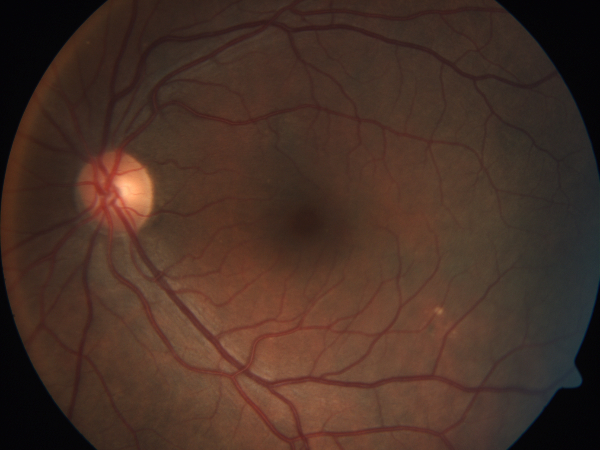

In [30]:
img = cv2.imread(os.path.join("train_images", IMAGE_NAME))
img = cv2.resize(img, (600, 450))
cv2_imshow(img)

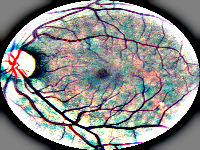

In [31]:
def process_image(img) :
    img = img.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img = cv2.addWeighted(img,4, cv2.GaussianBlur(img , (0,0) , 30) ,-4 ,128)
    img = circle_crop(img, 20)
    img = cv2.resize(img, (200, 150))
    return img

def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]

    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    mask = gray_img>tol
        
    check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
    if (check_shape == 0): 
        return img 

    img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
    img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
    img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    img = np.stack([img1,img2,img3],axis=-1)
    return img
	
	
def circle_crop(img, sigmaX):
	img = crop_image_from_gray(img)
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	height, width, depth = img.shape
	x = int(width/2)
	y = int(height/2)
	r = np.amin((x,y))
	circle_img = np.zeros((height, width), np.uint8)
	cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
	img = cv2.bitwise_and(img, img, mask=circle_img)
	img = crop_image_from_gray(img)
	img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
	return img

cv2_imshow(process_image(img))

## Using the preprocessing to generate new dataset

In [37]:
def load_data(dir, files, labels, allowed) :
  x = []
  y = []
  l = len(files)
  for i in range(2000):   # To save time
    if labels[i] not in allowed : 
      continue
    pth = os.path.join(dir, str(files[i])+".png")
    img = cv2.imread(pth)
    img = process_image(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x.append(img.flatten())
    y.append(labels[i])
    if (i+1)%100==0 :
      print(f"Completed : {i+1}")
  
  df = pd.DataFrame(x)
  df["label"] = y
  return df
  
data = load_data("train_images", train["id_code"], train["diagnosis"], [0,4])

Completed : 100
Completed : 200
Completed : 300
Completed : 400
Completed : 600
Completed : 700
Completed : 900
Completed : 1100
Completed : 1200
Completed : 1400
Completed : 1500
Completed : 1700
Completed : 1900
Completed : 2000


In [38]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,label
0,-128,-128,-128,-128,-128,-128,-128,-128,-128,-128,...,-128,-128,-128,-128,-128,-128,-128,-128,-128,4
1,-128,-128,-128,-128,-128,-128,-128,-128,-128,-128,...,-128,-128,-128,-128,-128,-128,-128,-128,-128,0
2,-128,-128,-128,-128,-128,-128,-128,-128,-128,-128,...,-128,-128,-128,-128,-128,-128,-128,-128,-128,0
3,-128,-128,-128,-128,-128,-128,-128,-128,-128,-128,...,-128,-128,-128,-128,-128,-128,-128,-128,-128,4
4,-128,-128,-128,-128,-128,-128,-128,-128,-128,-128,...,-128,-128,-128,-128,-128,-128,-128,-128,-128,0


In [39]:
data.shape

(1121, 30001)

In [40]:
x = data.drop("label", axis=1)
y = data["label"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

In [41]:
# A simple scaling
x_train = x_train/255
x_test = x_test/255

# Processed

## Logistic Regression

In [42]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [43]:
classifier.score(x_test, y_test)

0.9646017699115044

## Gaussian Bayes

In [44]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [45]:
classifier.score(x_test, y_test)

0.8849557522123894

## K Nearest

### Optimal K Value = Square Root (samples)

In [46]:
OPTIMAL_K = int(len(x_train)**0.5)
print(OPTIMAL_K)

31


### A range of 10% around optimal K

In [47]:
OPTIMAL_MIN = int(0.9*OPTIMAL_K)
OPTIMAL_MAX = int(1.1*OPTIMAL_K)
print(OPTIMAL_MIN, OPTIMAL_MAX)

27 34


### Searching for K with max accuracy in the range

In [48]:
scores = []
max_score = 0
max_accuracy_k = -1

for i in range(OPTIMAL_MIN, OPTIMAL_MAX+1):
  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(x_train, y_train)
  score = classifier.score(x_test, y_test)

  scores.append(score)
  if score > max_score :
    max_score = score
    max_accuracy_k = i 

In [49]:
for i in range(len(scores)) : 
  print(f"{OPTIMAL_MIN+i}   {scores[i]}")
print(max_score)
print(max_accuracy_k)

27   0.8672566371681416
28   0.8672566371681416
29   0.8672566371681416
30   0.8672566371681416
31   0.8672566371681416
32   0.8672566371681416
33   0.8672566371681416
34   0.8672566371681416
0.8672566371681416
27


In [50]:
classifier = KNeighborsClassifier(n_neighbors = 47)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=47)

In [51]:
classifier.score(x_test, y_test)

0.8672566371681416

## Random Forest

In [52]:
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [53]:
classifier.score(x_test, y_test)

0.9734513274336283

# Comparison

In [55]:
N_IMAGES = [2100, 1121]

print(f"Images in trial 1 (unprocessed) : {N_IMAGES[0]}")
print(f"Images in trial 2 (processed)   : {N_IMAGES[1]}")

Images in trial 1 (unprocessed) : 2100
Images in trial 2 (processed)   : 1121


In [59]:
accuracies = [
     [0.9571428571428572, 0.9646017699115044],
     [0.7666666666666667, 0.8849557522123894],
     [0.9380952380952381, 0.8672566371681416],
     [0.9714285714285714, 0.9734513274336283],
]

data = []
sums = [0, 0, 0]
def pf(i) :
  return int(i*10000)/100

for i, j in accuracies : 
  data.append((pf(i), pf(j), pf(j-i)))
  sums[0] += i
  sums[1] += j
  sums[2] += j-i

data.append((pf(sums[0]/4), pf(sums[1]/4), pf(sums[2]/4)))

df = pd.DataFrame(data)
df.columns = ["Unprocessed", "Processed", "Change"]
df.index = ["Logistic Reg.", "Gaussian Bayes", "K Nearest Nghbr.", "Random Forest", "Average"]

df

,Unprocessed,Processed,Change
Logistic Reg.,95.71,96.46,0.74
Gaussian Bayes,76.66,88.49,11.82
K Nearest Nghbr.,93.80,86.72,-7.08
Random Forest,97.14,97.34,0.20
Average,90.83,92.25,1.42


# Conclusion 2 : 
With image enhancement and processing in place, a general improvement in results of all the models was observed, even with nearly half data.